In [1]:
import numpy as np
import pickle
import pandas as pd
import os
from simulator_utils import extend_material_parameters, HiddenPrints, run_simulation

-------------------------------------------------------
Start Executing FEM_Q Script
-------------------------------------------------------


In [2]:
sample_numpy = False
single_sample = True

In [3]:
# Inputs for iteration

if sample_numpy:
    # Importing sampled data from numpy file (only for carrying out multiple simulations)
    path = '..\\..\\01_SamplingFeatures\\data_20241104_1545_case8'
    features = np.load(os.path.join(path, 'outfile.npy'))                   # "outfile.npy" --> lin.el. steel, # "outfile_glass.npy" --> glass, # "outfile_RC.npy" --> RC
    print(features.shape[0])
    
    mat_tot_dict = {
        'L': features[:,0],         # length
        'B': features[:,1],         # width
        'E_1': features[:,2],       # Young's modulus steel / glass / concrete
        'E_2': features[:,3],       # Young's modulus - / interlayer / reinforcing steel
        'ms': features[:,4],        # mesh_size
        'F': features[:,5],         # force_magnitude
        's': features[:,6],         # scenario 0...6
        't_1': features[:,7],       # thickness of the plate
        't_2': features[:,8],       # thickness of plate
        'nl': features[:,9],        # amount of layers
        'nu_1': features[:,10],     # Poisson's ratio
        'nu_2': features[:,11],     # Poisson's ratio
        'mat': features[:,12]       # Material type     (1 = lin.el., 3 = CMM, 10 = glass)
    }

elif sample_numpy == False and not single_sample: 
    # importing sampled data from dict (only for carrying out multiple simulations)
    # path = '..\\..\\01_SamplingFeatures\\output\\data_20241111_0904_case10'
    # path = '..\\..\\01_SamplingFeatures\\output\\data_20241220_1127_case10'
    path = '..\\..\\01_SamplingFeatures\\output\\data_20250522_1620_case10'
    with open(os.path.join(path, 'outfile.pkl'),'rb') as handle:            # "outfile.pkl" --> lin.el. steel, # "outfile_glass.pkl" --> glass, # "outfile
        in_dict = pickle.load(handle)
        print(in_dict['L'].shape[0])
    
    mat_tot_dict_ = in_dict

if single_sample: 
    # pure shear (for RC linear, mat = 1, scenario 8)
    # mat_tot_dict_ = {
    #     'L': np.array([7200]),
    #     'B': np.array([7200]),
    #     'E_1': np.array([210000]),
    #     'E_2': np.array([210000]),
    #     'ms': np.array([720]),
    #     'F': np.array([72000]),
    #     's': np.array([8]),
    #     't_1': np.array([30]),
    #     't_2': np.array([0]),
    #     'nl': np.array([20]),
    #     'nu_1': np.array([0.3]),
    #     'nu_2': np.array([0]),
    #     'mat': np.array([1])
    # }

    # moment + normal force (for RC linear, mat = 1, scenario 11)
    # mat_tot_dict_ = {
    #     'L': np.array([7500]),
    #     'B': np.array([7500]),
    #     'E_1': np.array([33600]),
    #     'E_2': np.array([33600]),
    #     'ms': np.array([750]),
    #     'F': np.array([0.01]),
    #     's': np.array([11]),
    #     't_1': np.array([200]),
    #     't_2': np.array([0]),
    #     'nl': np.array([20]),
    #     'nu_1': np.array([0.2]),
    #     'nu_2': np.array([0]),
    #     'mat': np.array([1])
    # }


    # bending 2D (for glass, mat = 10, scenario 20)
    # mat_tot_dict_ = {
    #     'L': np.array([1500]),
    #     'B': np.array([1500]),
    #     'E_1': np.array([70000]),
    #     'E_2': np.array([300]),
    #     'ms': np.array([150]),
    #     'F': np.array([0.005]),
    #     's': np.array([20]),
    #     't_1': np.array([5]),
    #     't_2': np.array([0.4]),
    #     'nl': np.array([5]),
    #     'nu_1': np.array([0.23]),
    #     'nu_2': np.array([0.5]),
    #     'mat': np.array([10])
    # }


    # bending 2D, with single force in mid-plane (for RC nonlinear, mat = 3, scenario 20)
    mat_tot_dict_ = {
        'L': np.array([10500]),
        'B': np.array([10500]),
        'CC': np.array([2]),            # concrete class: 0...5 for C25/30...C50/60
        'E_1': np.array([0]),           # will be given by CC, does not need to be defined here.
        'E_2': np.array([0]),
        'ms': np.array([1050]),
        'F': np.array([0.005]),
        's': np.array([20]),
        't_1': np.array([350]),
        't_2': np.array([0]),
        'nl': np.array([20]),
        'nu_1': np.array([0]),
        'nu_2': np.array([0]),
        'mat': np.array([3]),
        'rho': np.array([0.015])
    }


    # bending 1D (for RC nonlinear, mat = 3, scenario 10)
    # mat_tot_dict_ = {
    #     'L': np.array([10500]),
    #     'B': np.array([10500]),
    #     'CC': np.array([2]),            # concrete class: 0...5 for C25/30...C50/60
    #     'E_1': np.array([0]),           # will be given by CC, does not need to be defined here.
    #     'E_2': np.array([0]),
    #     'ms': np.array([1050]),
    #     'F': np.array([0.005]),
    #     's': np.array([10]),
    #     't_1': np.array([350]),
    #     't_2': np.array([0]),
    #     'nl': np.array([20]),
    #     'nu_1': np.array([0]),
    #     'nu_2': np.array([0]),
    #     'mat': np.array([3]),
    #     'rho': np.array([0.015])
    # }




if mat_tot_dict_['mat'] == 3:
    mat_tot_dict = {}
    mat_tot_dict = extend_material_parameters(mat_tot_dict_)
else: 
    mat_tot_dict = mat_tot_dict_

mat_tot = pd.DataFrame.from_dict(mat_tot_dict)
print(mat_tot)

       L      B  CC      E_1  E_2    ms      F   s  t_1  t_2  ...    fsu  \
0  10500  10500   2  35000.0    0  1050  0.005  20  350    0  ...  470.0   

         Es     Esh     D  tb0  tb1      ect     ec0   fcp  fct  
0  205000.0  8000.0  16.0  6.4  3.2  0.00009  0.0023  35.0  3.2  

[1 rows x 26 columns]


-------------------------------------------------------
1 Start Meshing with gmsh
-------------------------------------------------------
1.1 Assemble Model and mesh
1.2 Boundary Conditions and Loads
1.3 Read Material, Constitutive Model and Integration Options
1.4 Postprocess Mesh
   1.41 Node Coordinates
   1.42 Node Connectivity
   1.43 Element Center Information 1/2
   1.44 Element Numbering
   1.45 Global Coordinate Transformation
   1.46 Node Information
   1.47 Flip Element Arrangement Clockwise
   1.48 Element Center Information 2/2
   1.49 Element Connectivity
   1.410 Element Integration Point Information
   1.411 Geometrical Information per Element
   1.412 Material Information per Element
   1.413 Masks for Nodes in Areas
   1.414 Coplanar Nodes
-------------------------------------------------------
2 Solution
-------------------------------------------------------
2.1 Assembly of force vector and condensed DOFs
2.2 Solution for Linear Elasticity
u [[-0.00000000e+00]
 [-0.

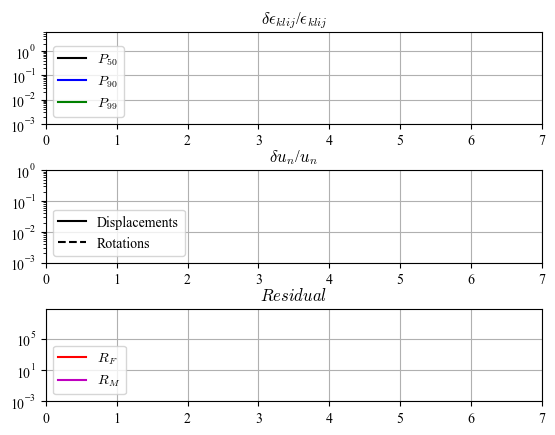

 - Iteration step 0 complete, sum of residual forces = 2879546.1
fi [[ 37748.23865741]
 [ 37747.22770569]
 [-34057.11895848]
 [-85636.78524251]
 [ 85625.3500826 ]
 [     0.        ]]
Activated sig_cart_33
scx, scy (7.846489036263529e-07+1e-17j)   (9.228051219456557e-07+0j)
ssx, ssy 0   0
Activated sig_cart_33
scx, scy (7.846489036263529e-07+0j)   (9.228051219456557e-07+1e-17j)
ssx, ssy 0   0
Activated sig_cart_33
scx, scy (7.846489036263529e-07+0j)   (9.228051219456557e-07+0j)
ssx, ssy 0   0
 - Iteration step 1 complete, maximum residual = 8810179.0


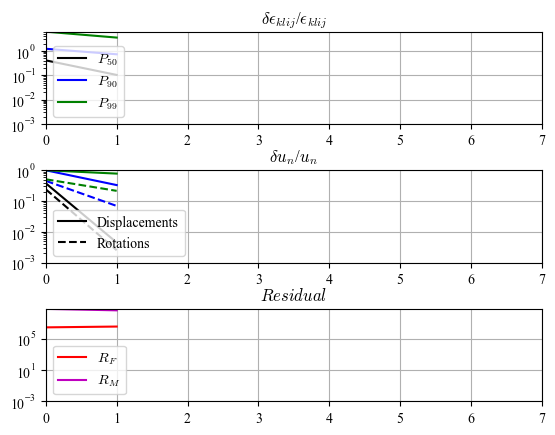

 - Iteration step 1 complete, sum of residual forces = 3649775.5
fi [[ 3.80127967e+04]
 [ 3.80114232e+04]
 [-3.37671921e+04]
 [ 2.23559196e+01]
 [-2.25846707e+01]
 [ 0.00000000e+00]]
Activated sig_cart_33
scx, scy (7.628834806404797e-07+1e-17j)   (8.976758427178466e-07+0j)
ssx, ssy 0   0
Activated sig_cart_33
scx, scy (7.628834806404797e-07+0j)   (8.976758427178466e-07+1e-17j)
ssx, ssy 0   0
Activated sig_cart_33
scx, scy (7.628834806404797e-07+0j)   (8.976758427178466e-07+0j)
ssx, ssy 0   0
 - Iteration step 2 complete, maximum residual = 809560.2


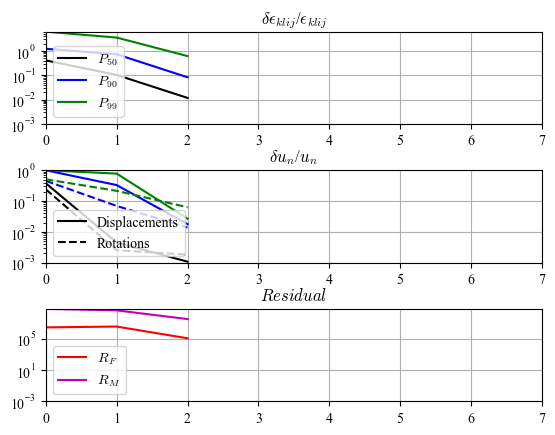

 - Iteration step 2 complete, sum of residual forces = 115565.2
fi [[ 3.81708127e+04]
 [ 3.81691412e+04]
 [-3.38163171e+04]
 [-4.73913564e+00]
 [ 4.89181082e+00]
 [ 0.00000000e+00]]
Activated sig_cart_33
scx, scy (7.624085865835154e-07+1e-17j)   (8.972921738945657e-07+0j)
ssx, ssy 0   0
Activated sig_cart_33
scx, scy (7.624085865835154e-07+0j)   (8.972921738945657e-07+1e-17j)
ssx, ssy 0   0
Activated sig_cart_33
scx, scy (7.624085865835154e-07+0j)   (8.972921738945657e-07+0j)
ssx, ssy 0   0
 - Iteration step 3 complete, maximum residual = 56850.1


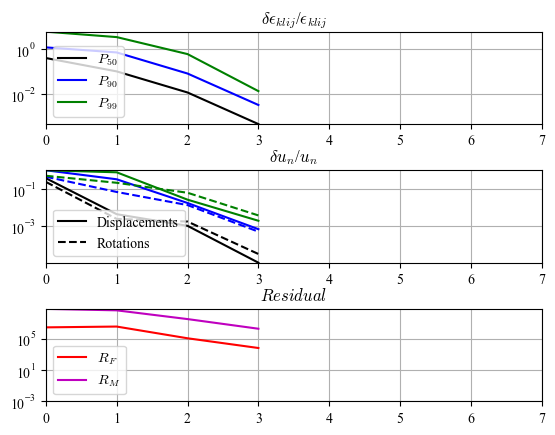

 - Iteration step 3 complete, sum of residual forces = 6571.1
fi [[ 3.81647739e+04]
 [ 3.81634805e+04]
 [-3.38144024e+04]
 [ 1.56541061e-01]
 [-2.56055206e-01]
 [ 0.00000000e+00]]
Activated sig_cart_33
scx, scy (7.624114939223602e-07+1e-17j)   (8.972974983502641e-07+0j)
ssx, ssy 0   0
Activated sig_cart_33
scx, scy (7.624114939223602e-07+0j)   (8.972974983502641e-07+1e-17j)
ssx, ssy 0   0
Activated sig_cart_33
scx, scy (7.624114939223602e-07+0j)   (8.972974983502641e-07+0j)
ssx, ssy 0   0
 - Iteration step 4 complete, maximum residual = 1077.2


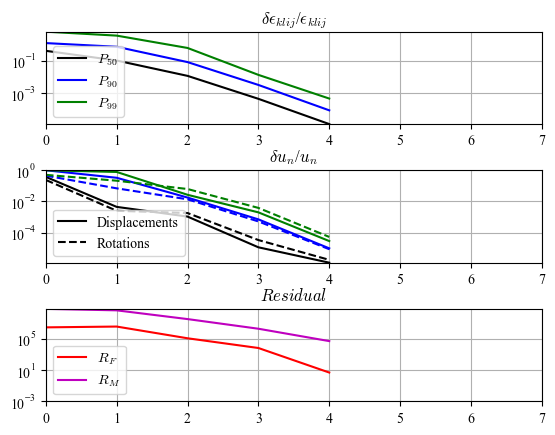

 - Iteration step 4 complete, sum of residual forces = 4.8
fi [[ 3.81650121e+04]
 [ 3.81637517e+04]
 [-3.38144931e+04]
 [-9.59265418e-03]
 [ 3.18848481e-03]
 [ 0.00000000e+00]]
Activated sig_cart_33
scx, scy (7.624113670567647e-07+1e-17j)   (8.972973311588204e-07+0j)
ssx, ssy 0   0
Activated sig_cart_33
scx, scy (7.624113670567647e-07+0j)   (8.972973311588204e-07+1e-17j)
ssx, ssy 0   0
Activated sig_cart_33
scx, scy (7.624113670567647e-07+0j)   (8.972973311588204e-07+0j)
ssx, ssy 0   0
 - Iteration step 5 complete, maximum residual = 36.6


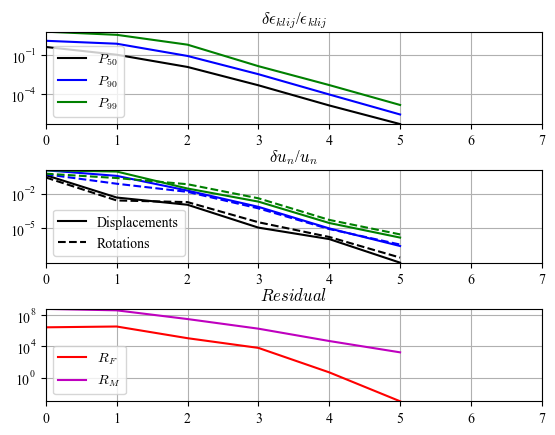

 - Iteration step 5 complete, sum of residual forces = 0.0
fi [[ 3.81650119e+04]
 [ 3.81637498e+04]
 [-3.38144964e+04]
 [ 8.65525566e-04]
 [-3.23149841e-04]
 [ 0.00000000e+00]]
Activated sig_cart_33
scx, scy (7.624113731769822e-07+1e-17j)   (8.972973394821214e-07+0j)
ssx, ssy 0   0
Activated sig_cart_33
scx, scy (7.624113731769822e-07+0j)   (8.972973394821214e-07+1e-17j)
ssx, ssy 0   0
Activated sig_cart_33
scx, scy (7.624113731769822e-07+0j)   (8.972973394821214e-07+0j)
ssx, ssy 0   0
 - Iteration step 6 complete, maximum residual = 2.1


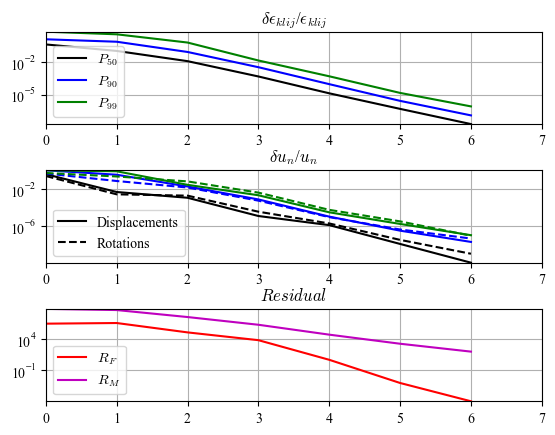

 - Iteration step 6 complete, sum of residual forces = 0.0
Activated sig_cart_33
scx, scy (8.298563364527459e-07+1e-17j)   (8.29845340794049e-07+0j)
ssx, ssy 0   0
Activated sig_cart_33
scx, scy (8.298563364527459e-07+0j)   (8.29845340794049e-07+1e-17j)
ssx, ssy 0   0
Activated sig_cart_33
scx, scy (8.298563364527459e-07+0j)   (8.29845340794049e-07+0j)
ssx, ssy 0   0
2.4 Solution complete
 - Maximum displacements:
   - ux_max = 0.02
   - uy_max = 0.02
   - uz_max = 3.521
 - Sum of applied forces:
   - Fx = 0.0
   - Fy = 0.0
   - Fz = -551250.0
 - Sum of reaction forces:
   - Rx = 27.3
   - Ry = 26.3
   - Rz = 421617.6
total time used:  43.44570326805115
time used in stress calculation 21.24028515815735
time used in strain calculation 1.5165541172027588
time used in stiffness matrix calculation 2.1337714195251465
time used in B-matrix calculation 1.1623258590698242
time used in stiffness matrix inversion 0.22998619079589844
time used in calculation of sh 1.1680221557617188
time used in 

In [4]:
conv_plt = True
simple = True                           # Turn on this feature to run the simulation only for n_simple input sets (for debugging)
n_simple = 1                            # Number of simple input sets to run

mat_res = run_simulation(mat_tot, conv_plt, simple, n_simple)

In [5]:
mat_res_pd = pd.DataFrame.from_dict(mat_res)

# Add columns for simulation number (SN) and element number (EN)

mat_res_pd['SN'] = mat_res_pd.index
mat_res_pd['EN'] = mat_res_pd['sig_g'].apply(lambda x: np.arange(x.shape[0]))
print('Shape of first sig_g:', mat_res_pd['sig_g'][0].shape[0], 'is equal to shape of first EN array:', mat_res_pd['EN'][0].shape[0])

# Save relevant parameters

# mat_res_pd.to_pickle(os.path.join(r'C:\Users\vbalmer\Documents\GitHub\ShellSim\02_Simulator\Simulator\results','mat_res.pkl'))
mat_res_pd.to_pickle(os.path.join('results','mat_res.pkl'))

# with open(os.path.join(path,'mat_res.pkl'), 'wb') as f:
#     pickle.dump(mat_res, f)

mat_res_pd.head()
print(mat_res_pd['t_1'])
print(mat_res_pd['s'])
print(mat_res_pd['sig_g'][0].shape)

Shape of first sig_g: 2800 is equal to shape of first EN array: 2800
0    350.0
Name: t_1, dtype: float64
0    20.0
Name: s, dtype: float64
(2800, 1, 1, 8)


In [6]:
# if data should be saved to folder instead of being overwritten with the next simulation, use save_folder = True

from datetime import datetime
import shutil

save_folder = True

if save_folder:
    relative_path = 'results\\mat_res.pkl'
    source_folder = os.path.dirname(relative_path)
    file_name = os.path.basename(relative_path)

    current_time = datetime.now()
    new_folder = current_time.strftime("saved_runs\\data_%Y%m%d_%H%M_case"+str(int(mat_res_pd['s'][0])))
    new_folder_path = os.path.join(source_folder, new_folder)

    os.makedirs(new_folder_path, exist_ok=True)

    destination_path = os.path.join(new_folder_path, file_name)
    shutil.copy(relative_path, destination_path)

    print('File is copied to', destination_path)

File is copied to results\saved_runs\data_20250603_1525_case20\mat_res.pkl


In [7]:
# Print some convenient information: 
print('Shape of first simulation in sig_g:', mat_res_pd['sig_g'][0].shape)
print('Shape of first simulation in eps_g:', mat_res_pd['eps_g'][0].shape)
print('Shape of first simulation of Mx in POST:', mat_res_pd['POST'][0]['Mx'][0].shape)
print('Keys of mat_res_pd:', mat_res_pd.keys())
print('Shape of EN:', mat_res_pd['EN'][0].shape)

mat_res_pd['gauss_order'].head()

Shape of first simulation in sig_g: (2800, 1, 1, 8)
Shape of first simulation in eps_g: (2800, 1, 1, 8)
Shape of first simulation of Mx in POST: (100,)
Keys of mat_res_pd: Index(['BC', 'COORD_c', 'COORD', 'ELEMENTS', 'MATK', 'fe', 'GEOMA', 'GEOMK',
       'MASK', 'NODESG', 'POST', 'gauss_order', 'na', 'sig_g', 'eps_g', 'ux',
       'uy', 'uz', 'thx', 'thy', 'thz', 'De_tot', 'L', 'B', 'CC', 'E_1', 'E_2',
       'ms', 'F', 's', 't_1', 't_2', 'nl', 'nu_1', 'nu_2', 'mat', 'rho', 'fsy',
       'fsu', 'Es', 'Esh', 'D', 'tb0', 'tb1', 'ect', 'ec0', 'fcp', 'fct', 'SN',
       'EN'],
      dtype='object')
Shape of EN: (2800,)


0    2
Name: gauss_order, dtype: int64

In [8]:
mat_res_pd.loc[:,['B', 'L', 'ms']]

,B,L,ms
0,10500.0,10500.0,1050.0


In [9]:
# Check that outputs in sig_g are equivalent to outputs in "POST" matrix

if mat_res_pd['sig_g'][0][0,:,:,0] == mat_res_pd['POST'][0]['Nx'][0][0]:
    print('The values coincide to ', mat_res_pd['sig_g'][0][0,:,:,0])
else: 
    print('In sig_g we have ', mat_res_pd['sig_g'][0][0,:,:,0], 'in POST, Nx we have', mat_res_pd['POST'][0]['Nx'][0][0])

if mat_res_pd['sig_g'][0][0,:,:,3] == mat_res_pd['POST'][0]['Mx'][0][0]:
    print('The values coincide to ', mat_res_pd['sig_g'][0][0,:,:,3])
else: 
    print('In sig_g we have ', mat_res_pd['sig_g'][0][0,:,:,3], 'in POST, Mx we have', mat_res_pd['POST'][0]['Mx'][0][0])

# Note: The output of M should be equivalent, both in Nmm/mm
# Note: In the data_20241022 this was still wrong because POST not adjusted. This has only an influence on the pictures in DataSet but not on the data itself.

In sig_g we have  [[-51.65272384]] in POST, Nx we have -61.528508352010704
In sig_g we have  [[15786.0061342]] in POST, Mx we have 24194.585380065622


In [10]:
# print(mat_res_pd.keys())
print(mat_res_pd['eps_g'][0].shape)
print(mat_res_pd['eps_g'][0][:,0,0,0]) # these should correspond to eps_x
print(mat_res_pd['eps_g'][0][:,0,0,7]) # these should correspond to gamma_xz

(2800, 1, 1, 8)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.67075158e-06
 1.71497756e-06 1.71497732e-06]
[-2.59895631e-07 -2.59893729e-07 -2.47368626e-07 ... -6.60074598e-07
 -1.16257790e-06 -6.60074303e-07]
